# II. Проекции и системы координат


**Отобразить поверхность Земли на плоскости – самая практическая тема в картографии**

В этом разделе мы разберемся, зачем нам нужны картографические проекции и системы координат, почему их так много, и как знания о них помогут избежать ошибок при составлении карт.

А также **построим карту плотности населения по округам Санкт-Петербурга** и убедимся, что без знаний о системах координат, у нас это бы не получилось сделать


## 2.1 Краткая теория


Нам нужно отобразить поверхность земного шара(3D) на плоскости(2D), и, к сожалению, это не получится сделать без искажений.

Чтобы точно убедиться в этом – посмотрите чудесное видео [Why all world maps are wrong](https://www.youtube.com/watch?v=kIID5FDi2JQ)

Именно поэтому нам нужны ... ->


### Картографические проекции

<span style="color:#03A3A6">Картографические проекции - способ перехода от реальной, геометрически сложной земной поверхности к двумерной плоскости листа бумаги </span>

При проецировании данных на карте могут искажаться углы, площади и расстояния (что-то одно, или все сразу). В зависимости от типа искажений, проекция может быть равноугольной, равнопромежуточной или равновелкиой, соотвественно (или произвольной)

Ряд проекций рассчитаны для отображения всего Мира, но большинство из них созданы и оптимизированы для небольших частей земли, что позволяет сократить искажения до минимума

Проекции делать на разные группы на основе того, какая вспомогательная поверхность была использована при переходе от эллипсоида к карте: цилиндр, конус или плоскость

[Map Projection Explorer](https://www.geo-projections.com) – прекрасная платформа, которая рассказывает о 100 картографических проекциях: какие искажения они имеют, какая вспомогательная поверхность была использована при переходе от эллипсоида к плоскости (цилиндр, конус, лист), как выглядит карта Мира в каждой из них 🗺

![Alt text](https://www.e-education.psu.edu/geog486/sites/www.e-education.psu.edu.geog486/files/Lesson_05/Images/projection_surfaces.PNG)
Image source: ICSM.gov.au

<!-- Моя любимая проекция - проекция Бонне!
![Бонне](pictures/Bonne.png) -->


### Универсальная поперечная проекция Меркатора (UTM)

Универсальная поперечная проекция Меркатора (Universal Transverse Mercator, UTM) - одна из самых распространенных и широко используемых групп картографических проекций.

В ее основе лежит разделение поверхности Земли на 60 полос шириной по 6 градусов долготы каждая (отдельно в северном и южном полушариях, всего - 120). Каждая из этих полос имеет центральную ось, которая служит в качестве опорной линии для проекции.

За счет деления поверхности земного шара на множество отрезков, удается достичь минимальных искажений в пределах каждой зоны UTM.

![Alt text](https://www.dmap.co.uk/utmworld.gif)
Image Source: Dmap.co.uk


### Системы координат

<span style="color:#03A3A6">Системы координат(СК) - способ указания местоположения точек на поверхности Земли</span>

**Географические системы координат**

Географические системы координат знакомы нам еще со школьных уроков географии. Местоположение точки в пространстве определяется значениями широты и долготы в градусах. На основе этих координат вы сможете без дополнительной информации определить местонахождение объекта на карте.

Например, 59°57′ с. ш. 30°19′ в. д. - координаты Санкт-Петербурга <3

Одной из самых распространенных географичеcких систем координат – WGS 84. Б**о**льшая часть открытых данных, треков с мобильных устройств и пр. будут использовать эту СК.

**Прямоугольные системы координат (системы координат проекции)**

Системы координат проекции задаются на плоскости двумерной проекции, где каждая точка определяется двумя параметрами относительно центральной - начала координат. Эти параметры называются координатами X и Y.

Лишь по значениям координат точки, но не имея представление о том, в какой проекции данные, вы не сможете определить местонахождение объекта, так как начало координат всегда будет разным.

Единицы измерения - линейные, могут быть выражены метрах/километрах, футах или других единицах измерения.

![Системы координат](https://www.esri.com/arcgis-blog/wp-content/uploads/2022/02/grid2.png)
Image Source: esri.com


### EPSG

**EPSG (European Petroleum Survey Group) коды** - это числовые идентификаторы, используемые для однозначной идентификации различных систем координат, проекций и геодезических датумов. Они были разработаны Европейской группой по геодезии и разведке нефти (European Petroleum Survey Group) для использования в нефтегазовой промышленности, но теперь широко используются в геоинформационных системах (ГИС).

Например, самой популярной географической системе координат соответствует код EPSG:4326

Структура кода EPSG для UTM систем координат выглядит следующим образом:

- Для северного полушария: EPSG:326xx, где xx - номер зоны UTM
- Для южного полушария: EPSG:327xx, где xx - номер зоны UTM


## 2.2 Практика


В этом разделе мы попробуем построить карту плотности населения по округам Санкт-Петербурга и убедимся, что даже для такой с виду несложной задачи, важно понимать, как работать с разными системами координат


Импортируем библиотеки


In [1]:
import pandas as pd
import geopandas as gpd


Читаем данные округов Санкт-Петербурга


In [2]:
admin_okrug = gpd.read_file('data/spb_admin.gpkg', layer="okrug")

### Узнаем систему координат


In [3]:
admin_okrug.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Интересно! Давайте разберемся в том, что тут написано:

Это географическая система координат, представленная двумерными координатами (широта и долгота), и ее идентификатор – EPSG:4326

- Название СК: WGS 84:
- Информация об осях: используются эллипсоидальные координаты: широта (Lat) и долгота (Lon). Единицы измерения – градусы.
- Область применения данной системы координат: весь мир
- Используемый эллипсоид: WGS 84
- Нулевой меридиан: Гринвич


<p style="color:#03A3A6; font-style:italic">  А Вы знали, что Гринвичский меридиан был установлен впервые в качестве нулевого только в 1884 году? Это решение приняли на <a href="https://ru.wikipedia.org/wiki/Международная_меридианная_конференция" target="_blank">Международной меридианной конференции</a> в Вашингтоне


### Расчет площади полигонов


Есть метод geometry, который предоставляет нам доступ к геометрии объектов

И у этого метода есть прекрасный метод area, который возвращает площадь объектов

Давайте создадим в admin_okrug новое поле "area", куда запишем расчеты.


In [4]:
admin_okrug['area'] = admin_okrug.geometry.area

admin_okrug.head()


/var/folders/ry/9bb7wrz54vq_kn2ytlj6ynzm0000gn/T/ipykernel_60737/1718978662.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  admin_okrug['area'] = admin_okrug.geometry.area


,NAME,Popul,geometry,area
0,округ Пискарёвка,61706.0,"MULTIPOLYGON (((30.35925 59.99390, 30.37635 59...",0.001495
1,Смолячково,742.0,"MULTIPOLYGON (((29.42981 60.18954, 29.45195 60...",0.001283
2,Молодёжное,1685.0,"MULTIPOLYGON (((29.45195 60.20537, 29.45554 60...",0.002004
3,Серово,272.0,"MULTIPOLYGON (((29.48220 60.22101, 29.48917 60...",0.001564
4,Кронштадт,44374.0,"MULTIPOLYGON (((29.63402 60.03155, 29.63406 60...",0.003222


И вот тут незадача! Значения странные и очень маленькие. Что же с ними такое?

Давайте вспомним про систему координат этого слоя ... она географическая...и единицы измерения в градусах ... а значит и все расчеты будут тоже в градусах))

_Всегда обращайте внимание на "UserWarning" как при расчете площади выше, там тоже указано, что значения скорее всего будут некорректные, и чтобы получить верные, нужно перепроецировать данные...в данном случае выберем UTM, но перед этим нам нужно понять, в какую зону попадают наши данные_


#### Узнать подходящую UTM зону

UTM зону можно рассчитать самостоятельно на основе координат точки. Для вычисления номера зоны нам понадобится только долгота, а широта укажет на то, северная это зона или южная.

Напишем небольшую функцию для этой задачи:


In [5]:
def utm_zone(longitude):
    zone = int((longitude + 180) / 6) + 1
    return zone

Воспользуемся нашей функцией и проверим номер зоны для объекта, который находится на 30.33 градусе восточной долготы


In [6]:
longitude = 30.33  
zone = utm_zone(longitude)
print("Номер зоны UTM:", zone)

Номер зоны UTM: 36


На самом деле, выше мы просто потренировались в написании функций, и эту задачу можно решить проще :)

Для набора данных узнать UTM зону можно с помощью метода estimate_utm_crs()


In [7]:
admin_okrug.estimate_utm_crs()

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Отлично! Теперь мы знаем, что для нашего набора данных с округами Санкт-Петербурга подойдет зона 36N!


### Перепроецирование


Благодаря estimate_utm_crs() мы знаем нужную нам систему координат. Давайте запишем ее в отдельную переменную, чтобы в дальнейшем можно было использовать при перепроецировании данных


In [8]:
data_crs = admin_okrug.estimate_utm_crs()

Для перепроецирования мы воспользуемся методом to_crs(), внутри которого укажем целевую СК


In [9]:
admin_okrug_utm_36N = admin_okrug.to_crs(data_crs)
print(admin_okrug_utm_36N.crs)

EPSG:32636


Отлично! EPSG:32636 - 36N зона UTM


### Расчет площади 2.0


Попробуем еще раз рассчитать площадь округов Санкт-Петербурга и посмотрим на получившиеся значения


In [10]:
admin_okrug_utm_36N['area_new'] = admin_okrug_utm_36N.geometry.area

admin_okrug_utm_36N.head()

,NAME,Popul,geometry,area,area_new
0,округ Пискарёвка,61706.0,"MULTIPOLYGON (((352703.954 6653672.464, 353647...",0.001495,9.292112e+06
1,Смолячково,742.0,"MULTIPOLYGON (((302068.083 6677873.169, 303389...",0.001283,7.933135e+06
2,Молодёжное,1685.0,"MULTIPOLYGON (((303389.678 6679568.341, 303601...",0.002004,1.238612e+07
3,Серово,272.0,"MULTIPOLYGON (((305157.564 6681218.991, 305563...",0.001564,9.662041e+06
4,Кронштадт,44374.0,"MULTIPOLYGON (((312486.108 6659698.584, 312488...",0.003222,2.002856e+07


Теперь похоже на правду и это квадратные метры!

<p style="color:#26528C; font-style:italic"> Такая запись может быть не всем знакома, давайте разберем ее на одном из примеров: </br>
9.292112e+06 - это то же самое "9.292112 умножить на 10 в степени 6", то есть 9292112 квадратных метра или 9.3 квадратных километра

</p>


### Карта плотности населения


Посчитаем плотность в "человеках на квадратный километр", запишем это в новое поле "pop_density" и посмотрим на результат


In [11]:
admin_okrug_utm_36N.eval('pop_density = Popul / (area_new / 1000000)', inplace=True)

admin_okrug_utm_36N.head()

,NAME,Popul,geometry,area,area_new,pop_density
0,округ Пискарёвка,61706.0,"MULTIPOLYGON (((352703.954 6653672.464, 353647...",0.001495,9.292112e+06,6640.686076
1,Смолячково,742.0,"MULTIPOLYGON (((302068.083 6677873.169, 303389...",0.001283,7.933135e+06,93.531751
2,Молодёжное,1685.0,"MULTIPOLYGON (((303389.678 6679568.341, 303601...",0.002004,1.238612e+07,136.039328
3,Серово,272.0,"MULTIPOLYGON (((305157.564 6681218.991, 305563...",0.001564,9.662041e+06,28.151402
4,Кронштадт,44374.0,"MULTIPOLYGON (((312486.108 6659698.584, 312488...",0.003222,2.002856e+07,2215.536304


Построим статичную карту с помощью метода plot, на которой значения плотности населения отобразим с помощью картограммы


<p style="color:#26528C; font-style:italic"><strong>Картограмма</strong> - это способ картографического изображения, иллюстрирующий относительные показатели в пределах административного деления. Интенсивность значений показателя передается с фоновой окраски или штриховки. В английском языке картограмма - choropleth. Про другие способы изображения можно почитать в <a href="https://cartetika.ru/tpost/jvjoa541b1-11-sposobov-kartograficheskogo-izobrazhe" target="_blank">этой статье</a></p>


<Axes: >

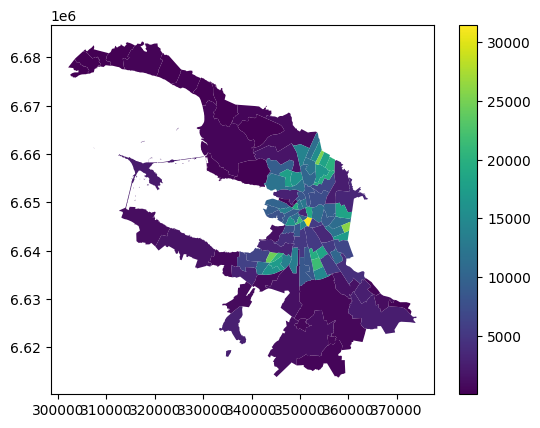

In [12]:
admin_okrug_utm_36N.plot(column='pop_density', cmap='viridis', legend=True)

Создадим интерактивную карту, как в предыдущем разделе


In [13]:
admin_okrug_utm_36N.explore(column='pop_density', cmap='viridis', legend=True, tiles='cartodbpositron')

Готово!


## 2.3 Установка системы координат


### Для данных без СК


Иногда бывают случаи, когда нам нужно определить систему координат у пространственных данных. Посмотрим на примере csv с театрами в Санкт-Петербурге.

Прочитаем данные и создаим на их основе GeoDataFrame:


In [14]:
theaters = pd.read_csv('data/spb_theaters.csv')
theaters[['latitude', 'longitude']] = theaters['coord'].str.split(',', expand=True)
theaters_gdf = gpd.GeoDataFrame(theaters, geometry=gpd.points_from_xy(theaters['longitude'], theaters['latitude']))

Провертим систему координат theaters_gdf


In [15]:
print(theaters_gdf.crs)

None


None - потому что мы не установили ее при создании GeoDataFrame! Но бывает, что к нам просто попадают данные без СК.

В этих случаях мы можем задать ее с помощью метода set_crs (вариант 1) или приравняв crs данных к нужной системе координат (вариант 2)


In [16]:
theaters_gdf = theaters_gdf.set_crs(epsg=4326) # вариант 1

theaters_gdf.crs = "EPSG:4326" # вариант 2

print(theaters_gdf.crs)

EPSG:4326


### Установка системы координат VS перепроецирование


**Во время перепроецирования происходит пересчет координат из одной системы координат в другую** – меняется СК у набора данных и перезаписываются координаты для всех объектов.

Если мы устанавливаем систему координат, то в этот момент пересчет координат не происходит, у нас просто перезаписывается определение системы координат у данных

При установке СК важно понимать, в какой СК представлены координаты объектов, и если выбрать неправильную, то данные могут оказаться в разных точках земного шара


## 2.4 Выбрать проекцию для карт


Наиболее распространенной проекцией для ГИС проектов, связанных с городскими данными, является универсальная поперечная проекция Меркатора (UTM).

Для более мелких масштабов, например, чтобы отобразить границы России или весь Мир, задача подбора необходимых проекций стоит значительно сложнее и во многом зависит от территории и задач Вашей работы.

Есть прекрасная книга 1987 года [Map Projections – A Working Manual](https://pubs.usgs.gov/pp/1395/report.pdf)📕, в которой можно найти подробное описание разных типов проекций, их особенности, историю и применение


## Итоги


Мы коротко рассмотрели теорию о проекциях и системах координат. Это ключевая тема при работе с пространственными данными. На простом примере создания карты плотности населения в Санкт-Петербурге убедились, что знания об особенностях систем координат очень важны для получения корректного итогового результата.


## Видео раздела


<iframe width="560" height="315" src="https://www.youtube.com/embed/5fI1MavKj4g?si=5iMXeaZWta45Iw_w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
